In [14]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from src.data_processing import load_data, clean_data, scale_features
from src.pca_analysis import run_pca
from src.clustering import run_kmeans

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

In [4]:
# Rebuild the pipeline
df = load_data("Stars.csv")
df = clean_data(df)

X_scaled, _ = scale_features(df)
X_pca, _ = run_pca(X_scaled)
_, clusters = run_kmeans(X_pca, n_clusters=6)

df["Cluster"] = clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
# Cluster vs. Star type
cluster_star_table = pd.crosstab(df["Cluster"], df["Star type"])
cluster_star_table

Star type,0,1,2,3,4,5
Cluster,,,,,,
0,40,40,11,8,0,0
1,0,0,0,0,0,28
2,0,0,0,11,14,0
3,0,0,29,21,0,0
4,0,0,0,0,3,10
5,0,0,0,0,23,2


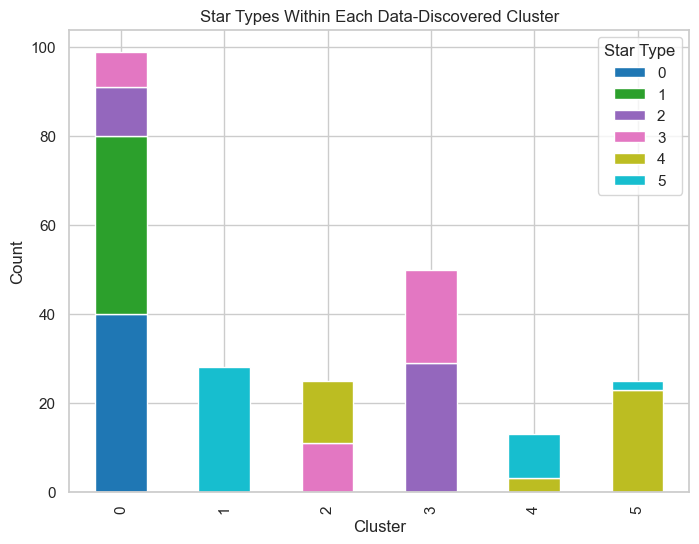

In [8]:
# Visual Alignment
cluster_star_table.plot(
    kind="bar",
    stacked=True,
    colormap="tab10"
)

plt.title("Star Types Within Each Data-Discovered Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Star Type")
plt.show()

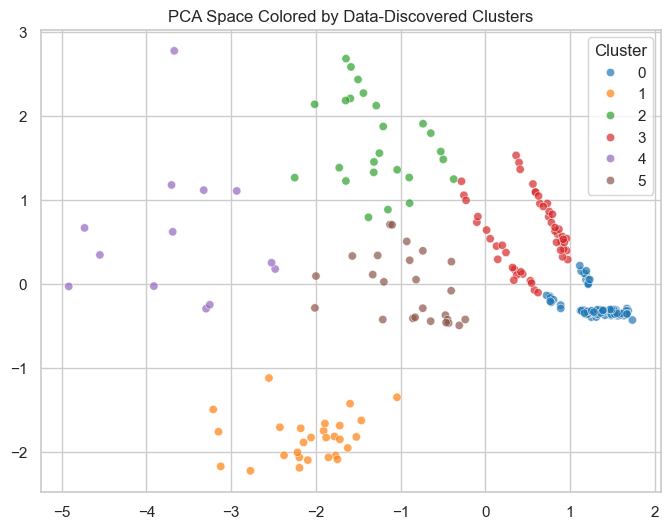

In [10]:
# PCA Space
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df["Cluster"],
    palette="tab10",
    alpha=0.7
)

plt.title("PCA Space Colored by Data-Discovered Clusters")
plt.show()

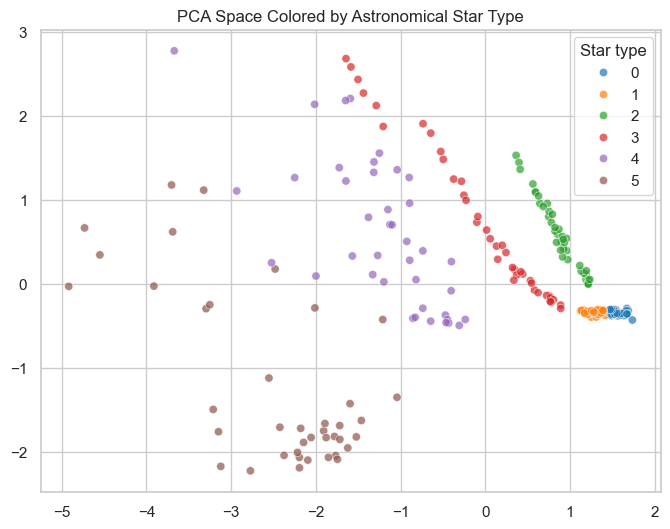

In [12]:
# Color by Astronomical Type
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df["Star type"],
    palette="tab10",
    alpha=0.7
)

plt.title("PCA Space Colored by Astronomical Star Type")
plt.show()

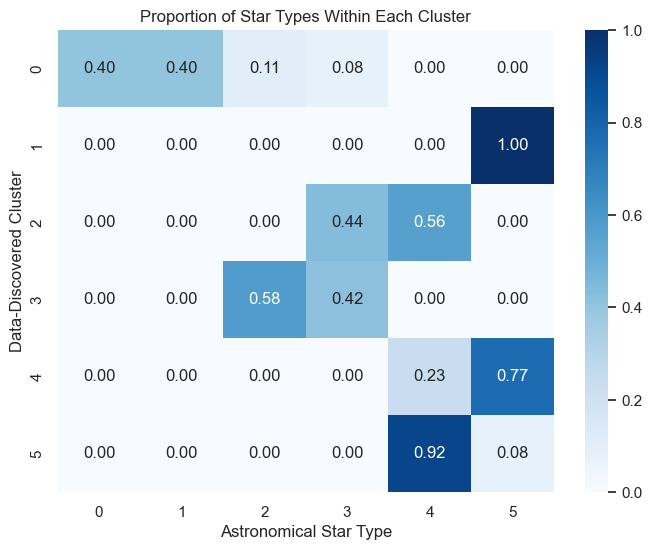

In [16]:
# Accuracy Heatmap

# Normalize rows (cluster-wise proportions)
cluster_star_prop = cluster_star_table.div(
    cluster_star_table.sum(axis=1),
    axis=0
)

sns.heatmap(
    cluster_star_prop,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)

plt.title("Proportion of Star Types Within Each Cluster")
plt.xlabel("Astronomical Star Type")
plt.ylabel("Data-Discovered Cluster")
plt.show()


In [18]:
# Cluster Purity
def cluster_purity(crosstab):
    total = crosstab.values.sum()
    dominant = crosstab.max(axis=1).sum()
    return dominant / total

purity_score = cluster_purity(cluster_star_table)
print(f"Overall Cluster Purity: {purity_score:.3f}")

Overall Cluster Purity: 0.600


In [20]:
dominant_class = cluster_star_table.idxmax(axis=1)
dominant_count = cluster_star_table.max(axis=1)

summary_df = pd.DataFrame({
    "Dominant Star Type": dominant_class,
    "Count": dominant_count
})

summary_df

,Dominant Star Type,Count
Cluster,,
0,0,40
1,5,28
2,4,14
3,2,29
4,5,10
5,4,23
